# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [67]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

## Step1. 下載資料

In [68]:
breast_cancer=datasets.load_breast_cancer()

In [69]:
X=breast_cancer.data
y=breast_cancer.target

## Step2. 區分訓練集與測試集

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step3. 建模

In [89]:
def SVM_plot(clf, title):
    # Select the first two features for visualization
    X_subset = X_train[:, :2]

    # Create a meshgrid for different feature combinations
    h = .02  # step size in the mesh
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot training points
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

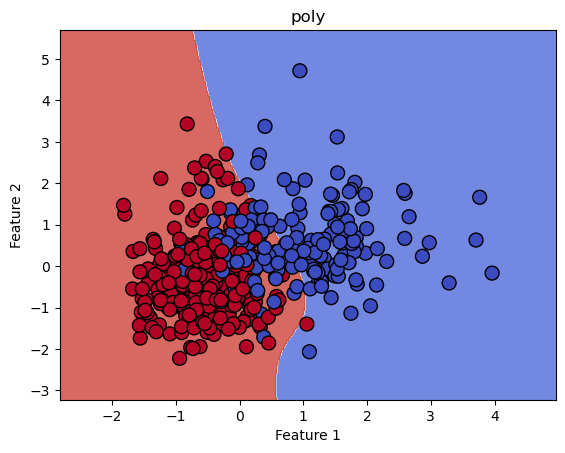

In [90]:
clf=svm.SVC(kernel='poly',C=1,degree=3)
clf.fit(X_train[:, :2],y_train)
SVM_plot(clf,'poly')

## Step4. 預測

```

```


In [78]:
clf.predict(X_test[:, :2])

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0])

## Step5. 準確度分析

In [86]:
print(clf.score(X_train[:, :2],y_train))
print(clf.score(X_test[:, :2], y_test))

0.8461538461538461
0.8245614035087719
